# Final Project

* Author: Jordan Glendrange
* Date: 2021-12-21

# Research Question

The data set I am working with is centered around heart failure. Each row in the dataset contains descriptive data about the person: (Age, Gender, Blood Pressure, Cholesterol, etc). There are two main objectives in this dataset. 1. Can I predict with a decent level of accuracy, who has a heart condition and who does not and 2. Which variable has the highest correlation with a heart condition.

# Database Connection

I had issues getting a database working on my local machine, so I just included the code to extract it via python. In the next section I am just going to read in the data through a csv.

In [1]:
# import pyodbc

# con = pyodbc.connect('DRIVER={SQL Server}, SERVER=localhost, Database=db, UID=user, PWD=password')
# cursor = con.cursor()

# query = """
#     SELECT *
#     FROM heart
# """

# cursor.execute(query)
# data = cursor.fetchall()

# Data Exploration  (EDA)

In [3]:
import pandas as pd

In [15]:
df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(df.shape)

(918, 12)


#### Summary statistics means, medians, quartiles 
The describe statistic is useful to us because now we know we need to scale our data. For example the mean of Cholesterol is 198 while the mean of OldPeak is 0.9. When we run this through our model Cholestrol may have a larger influence.

In [11]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


#### Missing value information
Here we don't have to do any manipulation to filter or fill NaN values

In [13]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Wrangling/Cleaning

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [54]:
df['Cholesterol']=df['Cholesterol'].replace(0,df['Cholesterol'].mean())

There are 2 primary things we need to do to this dataset: 1. Deal with our categorical data to be represented as integers rather 2. Scale our data to better fit our model

#### Dummy Data
We incresed the column count from 12 to 21

In [17]:
df_dummy = pd.get_dummies(df)

In [20]:
df_dummy.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [21]:
print([df_dummy.shape, df.shape])

[(918, 21), (918, 12)]


#### Scaling
Here we split the dataframe into the data, X, and the target, y. We scale X using MinMaxScaler

In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [39]:
X = df_dummy.drop('HeartDisease', axis=1)
y = df_dummy['HeartDisease']

In [42]:
scaler = MinMaxScaler()
 
X_scaled = scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled)
 
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Data Visualizations

For data viz we will switch back to df

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

I likt looking at a correlation matrix to understand how my variables are correlated. One that imediately sticks out is HeartDisease and Oldpeak with a 0.4 positive correlation. 

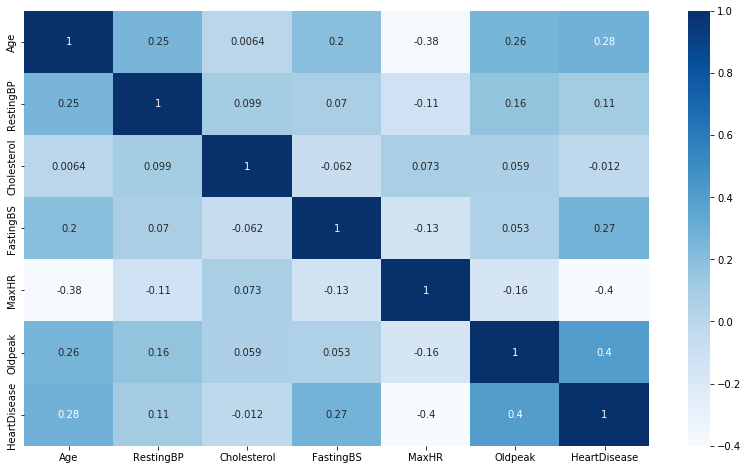

In [55]:
plt.figure(figsize=(14,8))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

Here we use a scatter to view multiple variables and how they are related. On the X axis is Age and the Y is RestingBP. Its color coded by Gender and split by RestingECG

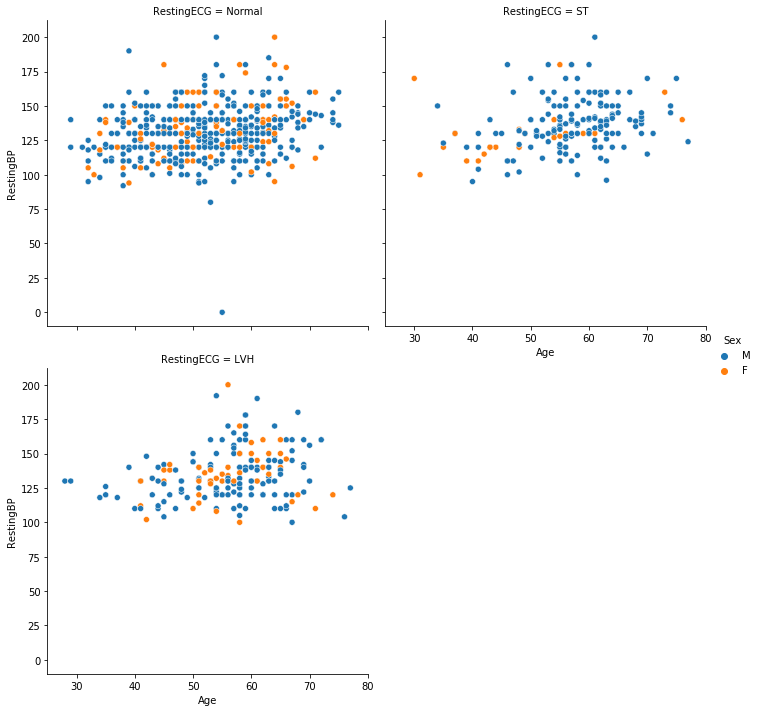

In [62]:
sns.relplot(
    x='Age', y='RestingBP', 
    data=df, hue='Sex', col='RestingECG', col_wrap=2)
plt.show()

It's important to check the distribution of your target variable. If its skewed, for example 99% to 1% you wont be able to accuratley rate your model. Here we have a pretty equal distibution.

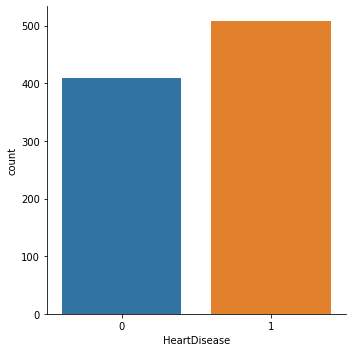

In [76]:
sns.catplot(x='HeartDisease', data=df, kind='count')
plt.show()

# Machine Learning

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Here we use train_test_split to split our data into training and testing data. 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we instantiate a LogisticRegression Instance and fit it using our Traning data

In [74]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Score tells us how accurate our model is. Our model was able to correctly identify 

In [75]:
logreg.score(X_test, y_test)

0.8840579710144928

Lastly we have the confustion matrix which shows us how many false positives and false negtives we are producing in the model

In [80]:
y_pred = logreg.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[100,  12],
       [ 20, 144]])

# Conclusions

Given the data set we were able to create a model with 88% accuracy. I think if we spent time fine tuning the model we could get it to be more accurate. One mistake I think we made was including too many variables from the get_dummies function. In conclusion we can use data to predict (within a reasonable level of accuracy) if someone has a heart disease.